# Bag-of-words linear regression

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.style.use('bmh')

In [23]:
import ujson
import json

from tqdm import tqdm_notebook

from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import r2_score
from sklearn.externals import joblib

from sent_order.models.linear_regression import Corpus
from sent_order.metrics import Metrics
from sent_order.utils import sort_by_key

In [24]:
dv = joblib.load('dv.bin')

In [25]:
vocab = joblib.load('vocab.bin')

In [26]:
fit = joblib.load('fit.bin')

In [27]:
len(vocab)

6000

In [6]:
test = Corpus('/Users/dclure/Projects/sent-order/data/test.json')

HBox(children=(IntProgress(value=1, bar_style='info', max=1), HTML(value='')))

In [7]:
test_x, test_y = zip(*test.xy(vocab))

HBox(children=(IntProgress(value=0, max=110615), HTML(value='')))

In [8]:
test_x = dv.transform(test_x)

In [16]:
def predict(corpus, dv, vocab, fit):
    """Predict order for all abstracts in a corpus.
    """
    gold_pred = []
    
    for ab in tqdm_notebook(corpus.abstracts):

        x, _ = zip(*ab.xy(vocab))
        x = dv.transform(x)

        pred = list(map(int, fit.predict(x).argsort()))
        gold = list(range(len(pred)))

        gold_pred.append([gold, pred])
        
    return gold_pred

In [17]:
test_gp = predict(test, dv, vocab, fit)

HBox(children=(IntProgress(value=0, max=110615), HTML(value='')))

In [18]:
metrics = Metrics(test_gp)

In [19]:
metrics.gold_pred[:10]

[[[0, 1, 2, 3, 4, 5, 6, 7], [6, 3, 7, 1, 4, 0, 5, 2]],
 [[0, 1, 2, 3], [2, 0, 1, 3]],
 [[0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 3, 2, 6, 7, 5, 4]],
 [[0, 1, 2, 3, 4, 5], [1, 2, 0, 5, 3, 4]],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [2, 1, 4, 0, 6, 5, 3, 8, 7, 9]],
 [[0, 1, 2, 3], [2, 0, 1, 3]],
 [[0, 1, 2, 3], [0, 1, 2, 3]],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 2, 3, 6, 1, 4, 9, 7, 8, 5]],
 [[0, 1, 2, 3], [0, 2, 1, 3]],
 [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 4, 6, 1, 2, 5, 3, 9, 7, 8]]]

In [21]:
with open('gp.json', 'w') as fh:
    ujson.dump(metrics.gold_pred, fh)

# Perfect order

In [12]:
metrics.overall_perfect_order_pct()

0.23986801066763097

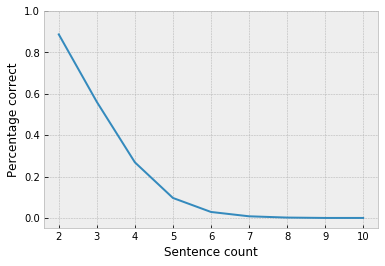

In [13]:
xy = metrics.perfect_order_pct_by_len()

x, y = zip(*xy.items())

plt.ylim(-0.05, 1)
plt.xticks(x)
plt.xlabel('Sentence count')
plt.ylabel('Percentage correct')
plt.plot(x, y)

# Kendall's tau

In [17]:
metrics.overall_kt()

0.5497242452182497

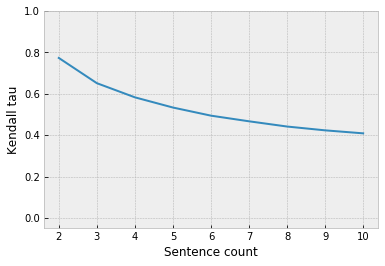

In [18]:
xy = metrics.avg_kt_by_len()

x, y = zip(*xy.items())

plt.ylim(-0.05, 1)
plt.xticks(x)
plt.xlabel('Sentence count')
plt.ylabel('Kendall tau')
plt.plot(x, y)

# Positional accuracy

In [19]:
metrics.overall_positional_accuracy_pct()

0.39316142931681619

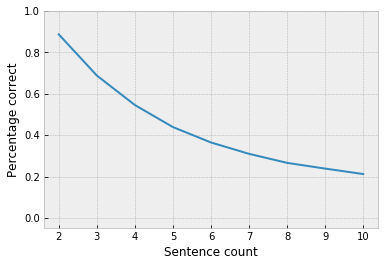

In [20]:
xy = metrics.positional_accuracy_pct_by_len()

x, y = zip(*xy.items())

plt.ylim(-0.05, 1)
plt.xticks(x)
plt.xlabel('Sentence count')
plt.ylabel('Percentage correct')
plt.plot(x, y)